In [1]:
import pandas as pd
import numpy as numpy
from zipfile import ZipFile
from functools import reduce
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
# # %pip install kaggle
# from kaggle import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")                                            

# print("Path to dataset files:", path)

In [3]:
path = r"C:\Users\ncc84\Downloads\archive.zip" 
extracted_file = "data_files"

In [4]:
# Extract the data from the archive 
# with ZipFile(path, "r") as f:
#     f.extractall("data_files")

In [5]:
# extracting multiple csv file from the zipped file
data_frames = {}

for file in os.listdir(extracted_file):
    if file.endswith('csv'):
        file_path = os.path.join(extracted_file, file)
        data_frames[file] = pd.read_csv(file_path)

In [6]:
# Printing name of all the csv files
for name, df in data_frames.items():
    print(f"{name}")

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [7]:
# Reading the customer file
customers = pd.read_csv(r"data_files/olist_customers_dataset.csv")
customers.head()
print(customers.shape)
print(customers.columns)

(99441, 5)
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


In [8]:
# Reading the geolocation_dataset file
geolocation_dataset = pd.read_csv(r"data_files/olist_geolocation_dataset.csv")
geolocation_dataset.head()
print(geolocation_dataset.shape)
print(geolocation_dataset.columns)

(1000163, 5)
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


In [9]:
# Reading the order_items dataset file
order_items = pd.read_csv(r"data_files/olist_order_items_dataset.csv")
order_items.head()
print(order_items.shape)
print(order_items.columns)

(112650, 7)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [10]:
# Reading order_payments dataset file
order_payments = pd.read_csv(r"data_files/olist_order_payments_dataset.csv")
order_payments.head()
print(order_payments.shape)
print(order_payments.columns)

(103886, 5)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


In [11]:
# Reading the products_dataset file
order_products = pd.read_csv(r"data_files/olist_products_dataset.csv")
order_products.head()
print(order_products.shape)
print(order_products.columns)

(32951, 9)
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [12]:
# Reading order_reviews dataset file
order_reviews = pd.read_csv(r"data_files/olist_order_reviews_dataset.csv")
order_reviews.head()
print(order_reviews.shape)
print(order_reviews.columns)

(99224, 7)
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


In [13]:
# Reading the orders_datset file
order_dataset = pd.read_csv(r"data_files/olist_orders_dataset.csv")
order_dataset.head()
print(order_dataset.shape)
print(order_dataset.columns)

(99441, 8)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [14]:
# Reading the sellers_datset file
sellers = pd.read_csv(r"data_files/olist_sellers_dataset.csv")
sellers.head()
print(sellers.shape)
print(sellers.columns)

(3095, 4)
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


In [15]:
# Reading the product_category_name_datset file
product_category = pd.read_csv(r"data_files/product_category_name_translation.csv")
product_category.head()
print(product_category.shape)
print(product_category.columns)

(71, 2)
Index(['product_category_name', 'product_category_name_english'], dtype='object')


In [16]:
# Print the loist of columns in each file
for name, df in data_frames.items():
    print(f"{name}: {list(df.columns)}")

olist_customers_dataset.csv: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
olist_geolocation_dataset.csv: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
olist_orders_dataset.csv: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
olist_order_items_dataset.csv: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
olist_order_payments_dataset.csv: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
olist_products_dataset.csv: ['product_id', 'product_category_name', 'pro

In [17]:
# Get sets of columns for each file
columns_per_file = {name: set(df.columns) for name, df in data_frames.items()}
columns_per_file

{'olist_customers_dataset.csv': {'customer_city',
  'customer_id',
  'customer_state',
  'customer_unique_id',
  'customer_zip_code_prefix'},
 'olist_geolocation_dataset.csv': {'geolocation_city',
  'geolocation_lat',
  'geolocation_lng',
  'geolocation_state',
  'geolocation_zip_code_prefix'},
 'olist_orders_dataset.csv': {'customer_id',
  'order_approved_at',
  'order_delivered_carrier_date',
  'order_delivered_customer_date',
  'order_estimated_delivery_date',
  'order_id',
  'order_purchase_timestamp',
  'order_status'},
 'olist_order_items_dataset.csv': {'freight_value',
  'order_id',
  'order_item_id',
  'price',
  'product_id',
  'seller_id',
  'shipping_limit_date'},
 'olist_order_payments_dataset.csv': {'order_id',
  'payment_installments',
  'payment_sequential',
  'payment_type',
  'payment_value'},
 'olist_order_reviews_dataset.csv': {'order_id',
  'review_answer_timestamp',
  'review_comment_message',
  'review_comment_title',
  'review_creation_date',
  'review_id',
  're

In [18]:
# Checking the columns for intersection
common_cols = reduce(set.intersection, columns_per_file.values())
print('Common columns across all CSVs:', common_cols)

Common columns across all CSVs: set()


**Merging dataset and why they should be merged**

1. **Customers ↔ Orders**

* **Key:** `customer_id`

* **Why:** Orders are made by customers. You can attach customer info (city, state, etc.) to each order.

Merge: `order_data` ↔ `customers`


2. **Orders ↔ Order Items**

* **Key:** `order_id`

* **Why:** Each order has one or more items. This links orders to products and sellers.

Merge: `order_data` ↔ `order_items`


3. **Order Items ↔ Products**

* **Key:** `product_id`

* **Why:** Each item corresponds to a product. You can bring in product details (category, dimensions, weight).

Merge: `order_items` ↔ `product`


4. **Products ↔ Product Category Translation**

* **Key:** `product_category_name`

* **Why:** Product categories are in Portuguese, and this dataset provides English translations.

Merge: `product` ↔ `product_category`


5. **Order Items ↔ Sellers**

* **Key:** `seller_id`

* **Why:** Each item is sold by a seller. This lets you connect sellers’ locations to orders.

Merge: `order_items` ↔ `sellers`


6. **Orders ↔ Payments**

* **Key:** `order_id`
* **Why:** Every order has a payment record (method, value, installments).

Merge: `order_data` ↔ `order_payment`


**Orders ↔ Reviews**

* **Key:** `order_id`

* **Why:** Customers leave reviews for orders (scores, comments)

Merge: `order_data` ↔ `order_reviews`


8. **Customers ↔ Geolocation**

* **Key:** `zip_code_prefix` (`customer_zip_code_prefix` vs `geolocation_zip_code_prefix`)

* **Why:** To attach latitude/longitude and city/state to customers.
Note: Multiple geolocations can share the same ZIP prefix → requires aggregation or nearest match.

Merge: `customers` ↔ `geolocation`


In [19]:
# 1. Customers + Orders (Checking the files for common columns)
print(order_dataset.columns)
print(customers.columns)

# Merging Customers with Orders
orders_customers = pd.merge(order_dataset, customers, on='customer_id', how='inner')
orders_customers.head()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [20]:
# Printing the shape of each columns
print("Merged Order + Customer",orders_customers.shape)
print("Order_dataset Shape:",order_dataset.shape)
print("Customer Shape:",customers.shape)

Merged Order + Customer (99441, 12)
Order_dataset Shape: (99441, 8)
Customer Shape: (99441, 5)


In [21]:
# 2. Order_customer + payments (Checking the files for common columns)
print(orders_customers.columns)
print(order_payments.columns)

# Merging the orders_customers with the order payments
orders_payments = pd.merge(orders_customers, order_payments, on='order_id', how='left')
orders_payments .head()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


In [22]:
# Printing the shape of each columns
print("Merged order_customer + order_payments:", orders_payments .shape)
print("Order_customers Shape:",orders_customers.shape)
print("Order_payments Shape:",order_payments.shape)

Merged order_customer + order_payments: (103887, 16)
Order_customers Shape: (99441, 12)
Order_payments Shape: (103886, 5)


In [23]:
# 3. Payments + review (Checking the files for common columns)
print(orders_payments.columns)
print(order_reviews.columns)

# Merging orders_payments with reviews
orders_reviews = pd.merge(orders_payments, order_reviews, on='order_id', how='left')
orders_reviews.head()


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [24]:
# Printing the shape of each columns
print("Merged orders_payments + reviews: ", orders_reviews.shape)
print("Order_payments Shape:",orders_payments.shape)
print("Order_review Shape:",order_reviews.shape)

Merged orders_payments + reviews:  (104478, 22)
Order_payments Shape: (103887, 16)
Order_review Shape: (99224, 7)


In [25]:
# 4. Orders_reviews + order_items (Checking the files for common columns)
print(orders_reviews.columns)
print(order_items.columns)

# Merging orders_reviews with order_items
orders_items = pd.merge(orders_reviews, order_items, on='order_id', how='left')
orders_items.head()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [26]:
# Printing the shape of each columns
print("Merged Order_Items + Reviews:", orders_items.shape)
print("Orders_reviews Shape:",orders_reviews.shape)
print("Order_items Shape:",order_items.shape)

Merged Order_Items + Reviews: (119143, 28)
Orders_reviews Shape: (104478, 22)
Order_items Shape: (112650, 7)


In [27]:
# 5. Order Items + Products (Checking the files for common columns)
print(orders_items.columns)
print(order_products.columns)

# Merging Order Items with Products
orders_products = pd.merge(orders_items, order_products, on='product_id', how='left')
orders_products.head()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value'],
      dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [28]:
# Printing the shape of each columns
print("Merged Orders_Items + order_products:", orders_products.shape)
print("Orders_items Shape:",orders_items.shape)
print("Order_products Shape:",order_products.shape)

Merged Orders_Items + order_products: (119143, 36)
Orders_items Shape: (119143, 28)
Order_products Shape: (32951, 9)


In [29]:
# 6. Orders_products + Products category translation (Checking the files for common columns)
print(orders_products.columns)
print(product_category.columns)

# Merging Orders_products with Products category translation
orders_products = pd.merge(orders_products, product_category, on='product_category_name', how='left')
orders_products.head()


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Index(['product_category_name', 'product_category_name_english'], dtype='object')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [30]:
# Printing the shape of each columns
print("Merged Orders_products + product_category_name:", orders_products.shape)
print("Orders_products Shape:",orders_products.shape)
print("Product_category_name. Shape:",product_category.shape)

Merged Orders_products + product_category_name: (119143, 37)
Orders_products Shape: (119143, 37)
Product_category_name. Shape: (71, 2)


In [31]:
# 7. New_orders_products + sellers (Checking the files for common columns)
print(orders_products.columns)
print(sellers.columns)

# Merging New_orders_products with sellers
orders_sellers = pd.merge(orders_products, sellers, on='seller_id', how='left')
orders_sellers.head()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [32]:
# Printing the shape of each columns
print("Merged new_orders_products + sellers:", orders_sellers.shape)
print("new_orders_products Shape:",orders_products.shape)
print("Sellers Shape:",sellers.shape)

Merged new_orders_products + sellers: (119143, 40)
new_orders_products Shape: (119143, 37)
Sellers Shape: (3095, 4)


In [33]:
# 8. Customers + Geolocation (via zip prefix) 
#  Note: many geolocations per ZIP, so we take first occurrence per prefix
print(orders_sellers.columns)
print(geolocation_dataset.columns)

# Grouping the geolocation by the zip_code
geo_unique = geolocation_dataset.groupby('geolocation_zip_code_prefix').first().reset_index()


final_merge = pd.merge(
    orders_sellers,
    geo_unique,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left')
final_merge.head()

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')
Index(['geolocation_zip_code_p

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,perfumery,31570.0,belo horizonte,SP,47813.0,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,auto,14840.0,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO


In [34]:
# Printing the shape of each columns
print("Merged orders_sellers + geolocation:", final_merge.shape)
print("orders_sellers Shape:",orders_sellers.shape)
print("Geolocation Shape:",geolocation_dataset.shape)

Merged orders_sellers + geolocation: (119143, 45)
orders_sellers Shape: (119143, 40)
Geolocation Shape: (1000163, 5)


### **PROBABILITY**

______________________________________________________________________
______________________________________________________________________
1. Probability of an Event

Concept: Basic probability = favorable outcomes / total outcomes.

Question: What is the probability that a randomly chosen order received a 5-star review?

In [35]:
# We will be using the orders_reviews data to answer this question

orders_reviews.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [36]:
# Probablity of 5-star review
# Out of all orders, what is the probability that a review has a 5-star rating?
# This tells us how likely a customer is to give the maximum satifaction score.

total_reviews = len(orders_reviews)
favorable = (orders_reviews['review_score']==5).sum()

prob_5_star = favorable / total_reviews

print(f"Probability of getting a 5 star: {round(prob_5_star * 100,2)}%")
print(f"The Probability of a customer rating the order 5-star is {prob_5_star}")

Probability of getting a 5 star: 57.26%
The Probability of a customer rating the order 5-star is 0.5725798732747565


**Interpretation of result**

Approximately 58% of the customers rate the product 5-star. This is the baselin "success" probability of excellent reviews

_______________________________________________________________
_______________________________________________________________

**2. Complementary Probability**

Concept: 
𝑃(A complement) = 1−P(A)

Question: What is the probability that a review is not 5 stars?


In [37]:
#If we know the probability of 5 stars, what’s the probability of not getting a 5-star review?
#This means any rating from 1 to 4.

# We are still going to use the review dataset
# Formula style

prob_not_5_star = (orders_reviews['review_score'] != 5).sum() / len(orders_reviews)

print(f"Probabilty of not getting 5-stars is {round(prob_not_5_star * 100, 2)}%")

Probabilty of not getting 5-stars is 42.74%


**Interpretation**

Approximately 42% of reviews are less than perfect. This highlights that not everyone is fully satisfied with product purchased
________________________________________________________________
________________________________________________________________

3. Joint Probability

Concept: P(A∩B)

Question: What is the probability that an order was paid by credit card and received a 5-star review?

In [38]:
#This gives the likelihood of two events happening together.

# Here we will be using the orders_payments and orders_reviews. And we have merged them already
# lets merge orders_payments and order_reviews

orders_payments_reviews = pd.merge( orders_reviews, orders_payments, on='order_id', how='left')
orders_payments_reviews



,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,...,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123821,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,credit_card,3.0,85.08
123822,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00
123823,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01
123824,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16


In [39]:
orders_payments_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'customer_unique_id_x',
       'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'customer_unique_id_y',
       'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y'],
      dt

In [40]:
# Calculating the probabilty 
total_orders = len(orders_payments_reviews)
favorable_joint = ((orders_payments_reviews['payment_type_y']=='credit_card') & (orders_payments_reviews['review_score']==5)).sum()

prob_joint = favorable_joint / total_orders

print(f"Probabibilty that credit card customers rated the order 5-stars is {round(prob_joint * 100, 2)}%")

Probabibilty that credit card customers rated the order 5-stars is 37.51%


**Interpretation**

Approximately 38% of all orders are both paid by credit card and got a 5-star

4. Conditional Probability


Concept:

`𝑃(𝐴∣𝐵)=𝑃(𝐴∩𝐵)/𝑃(𝐵)` 
                
`𝑃(𝐴∣𝐵)= Favourable_outcomes / Total_credit_card_outcomes`



Question: What is the probability that a review is 5 stars given that the payment was made by credit card?

In [41]:
# CHecking the primary types for the the payemnts
type_payment = orders_payments_reviews["payment_type_y"].unique()
print(type_payment)

['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]


In [42]:
# If we already know the payment method was credit card, what is the probability that the review is 5 stars?
# This measures satisfaction among credit card users only.
# We are solving for independent conditional probability

# We might take few steps, and solve beyond the question for proper understanding
# That is, P(5 stars∣payment method = X)

#𝑃(5∣credit_card)
#P(5∣voucher)
#P(5∣boleto)
#P(5∣debit_card)

# Each is a separate conditional distribution. They are not mutually exclusive outcomes of the same experiment.

#𝑃(5∣credit_card)
fave_cond1 = ((orders_payments_reviews['payment_type_y']=='credit_card') & (orders_payments_reviews['review_score']==5)).sum()
total_credit_card = (orders_payments_reviews['payment_type_y']=='credit_card').sum()
p_cond_credit = fave_cond1 / total_credit_card
print(f"The Probability that Credit card users rated the order 5 star is {round(p_cond_credit * 100, 2)}%")

#P(5∣voucher)
fave_cond2 = ((orders_payments_reviews['payment_type_y']=='voucher') & (orders_payments_reviews['review_score']==5)).sum()
total_voucher = (orders_payments_reviews['payment_type_y']=='voucher').sum()
p_cond_voucher = fave_cond2 / total_voucher
print(f"The Probability that vouchers users rated the order 5 star is {round(p_cond_voucher * 100, 2)}%")

#P(5∣boleto)
fave_cond3 = ((orders_payments_reviews['payment_type_y']=='boleto') & (orders_payments_reviews['review_score']==5)).sum()
total_boleto = (orders_payments_reviews['payment_type_y']=='boleto').sum()
p_cond_boleto = fave_cond3 / total_boleto
print(f"The Probability that boleto users rated the order 5 star is {round(p_cond_boleto * 100, 2)}%")


#P(5∣debit_card)
fave_cond4 = ((orders_payments_reviews['payment_type_y']=='debit_card') & (orders_payments_reviews['review_score']==5)).sum()
total_debit_card = (orders_payments_reviews['payment_type_y']=='debit_card').sum()
p_cond_debit = fave_cond4 / total_debit_card
print(f"The Probability that debit card users rated the order 5 star is {round(p_cond_debit * 100, 2)}%")


The Probability that Credit card users rated the order 5 star is 57.39%
The Probability that vouchers users rated the order 5 star is 55.71%
The Probability that boleto users rated the order 5 star is 56.95%
The Probability that debit card users rated the order 5 star is 60.17%


**Interpretation**

Each one is around 55-57% meaning, for every payment method, about half of customers gave 5-stars

_______________________________________________________________________________
_______________________________________________________________________________

6. Bayes’ Rule 

Concept:

`P(A∣B )= P(B∣A)⋅P(A) / P(B)`

A = payment

B = review =5

`P(review=5 | payment ) = P(payment | review=5).p(review =5) / p(payment)`


Question: Given that an order received a 5-star review, what is the probability that it was paid with each payment method (credit_card, boleto, voucher)?


Among only the 5-star reviews, how are payment methods distributed?

In [43]:
# Among orders that got a 5-star review, what fraction used each payment method (credit_card, boleto, voucher, debit_card, etc.)?
# That is, if we look at only 5-star reviews,  how are they split across payment types?

# Total number of 5-star reviews (denominator for all) - P(B)
total_5star = (orders_payments_reviews['review_score']==5).sum()

# -----P(payment = credit_card | review = 5) ----
fave_cond1 = ((orders_payments_reviews['payment_type_y'] =='credit_card') & (orders_payments_reviews['review_score']==5)).sum()
prob_cond1_credit = fave_cond1 / total_5star
print(f"The percentage of Credit Card users | 5-stars : {round(prob_cond1_credit * 100, 2)}%")

# -----P(payment = vouchers | review = 5) ----
fave_cond2 = ((orders_payments_reviews['payment_type_y'] =='voucher') & (orders_payments_reviews['review_score']==5)).sum()
prob_cond2_vouchers = fave_cond2 / total_5star
print(f"The percentage of voucher users | 5-stars : {round(prob_cond2_vouchers * 100, 2)}%")

# -----P(payment = boleto | review = 5) ----
fave_cond3 = ((orders_payments_reviews['payment_type_y'] =='boleto') & (orders_payments_reviews['review_score']==5)).sum()
prob_cond1_boleto = fave_cond3 / total_5star
print(f"The percentage of boleto users | 5-stars : {round(prob_cond1_boleto * 100, 2)}%")

# -----P(payment = debit_card | review = 5) ----
fave_cond4 = ((orders_payments_reviews['payment_type_y'] =='debit_card') & (orders_payments_reviews['review_score']==5)).sum()
prob_cond4_debit = fave_cond4 / total_5star
print(f"The percentage of debit card users | 5-stars : {round(prob_cond4_debit * 100, 2)}%")



The percentage of Credit Card users | 5-stars : 65.74%
The percentage of voucher users | 5-stars : 16.9%
The percentage of boleto users | 5-stars : 16.05%
The percentage of debit card users | 5-stars : 1.31%


**Interpretation**

1. `P(Credit Card | 5 stars)` = Among all 5-star reviews, what fraction used credit card? Among 5-star reviews, `65.74%` used credit card

2. `P(Voucher | 5 stars)` = Among all 5-star reviews, what fraction used voucher? Among 5-star reviews, `16.9%` used boleto.

3. `P(Boleto | 5 stars)` = Among all 5-star reviews, what fraction used boleto? `16.05%` of 5-star reviews uses Boleto payment method.

4. `P(Debit card | 5 stars)` = Among all 5-star reviews, what fraction used debit card? `1.31%` of 5-star reviews uses Debit card payment method.

Unlike P(5 | payment)- conditional probability , these will sum to approximately 100% across all payment methods, because every 5-star order must fall into exactly one payment category.

**I hope the interpretation or difference is clear enough, if not, please, go through it again**

### **Expectation and Variance**

**Expectation**
- This is what you would expect from an experiment if you repeat an experiment many times. In practice this means taking the average of the outcome of an experiment, the resulting value is the expectation. In statitics speak, we are talking about the mean(the centre of the distribution).
- So we talk about the baseline performance, the are actually talking about expectation.
- Examples of performance are average delivery time, average customer spend, average rating
- We use it to find out;
 - How long a customer typically wait to get his or her delivery?
 - What is the expected revenue per order?
 - What is the overall satisfaction level?
 - What is the expected sale per seller?
 

**Variance**
- This explain how far the result of an experiment is from what is expected. When this value is very high, we would conclude that outcome of the experiment is not consistent, it is not predictable, it is unstable. When the value is low, it speaks of predictability, consistency, and stability. In summary, the wider the spread the higher the risk, the narrower the spread the lower the risk and reliability.
- Note that variance is more interpretable when it is converted to standard deviation(Same unit as your data)


**Usecase**
- The combination of these two are use for risk assessment
- They are also used for measuring reliability - how consistent are deliveries, ratings, or payments?
- They are also use to make data driven decision - To choose sellers, couriers, products with stable perfomance not just high averages.
- Uncertainty estimation (used in confidence intervals and hypothesis testing)
- Machine Learning (feature scaling and PCA rely on mean & variance)

- **Lets see some examples**
   - Mean delivery time = 10 days, SD = 2 days
     - Meaning that “Most customers get deliveries between 8–12 days. Service is predictable.”

   - Mean delivery time = 10 days, SD = 6 days
     - Meaning that “Some customers get deliveries in 4 days, others in 16. Unreliable service.”

   - Mean review score = 4.2, SD = 0.5
     - “Almost everyone gives between 4–5 stars. Strong and consistent reputation.”

   - Mean review score = 4.2, SD = 1.8
     - “Some give 5, others 1. The average hides mixed experiences.”

**Question1**

What is the average delivery time (expectation) and variance (spread/consistency) of deliveries?

In [44]:
# print the columns
orders_payments_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'customer_unique_id_x',
       'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'customer_unique_id_y',
       'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y'],
      dt

In [48]:
# Convert the datetime columns to pandas datetime
orders_payments_reviews['order_purchase_timestamp_x']= pd.to_datetime(orders_payments_reviews['order_purchase_timestamp_x'])
orders_payments_reviews['order_delivered_customer_date_x']= pd.to_datetime(orders_payments_reviews['order_delivered_customer_date_x'])


In [49]:
# Calculate delivery time in days (extract days)
orders_payments_reviews['delivery_time_days'] = (orders_payments_reviews['order_delivered_customer_date_x'] - orders_payments_reviews['order_purchase_timestamp_x'])


In [56]:
# Drop missing values
delivery_times = orders_payments_reviews['delivery_time_days'].dropna()

# Convert to days
delivery_time = delivery_times.dt.days

In [60]:
# Calculating the mean of the delivery times
mean_delivery = delivery_time.mean()

# Calculating the variance and the standard deviation
var_delivery = delivery_time.var()
std_delivery = delivery_time.std()

print(f'The Expected delivery time (Mean): {round(mean_delivery, 2)} days')
print(f'The Expected delivery time (Variance): {round(var_delivery, 2)} days')
print(f'The Expected delivery time (Standard Variation): {round(std_delivery, 2)} days')

The Expected delivery time (Mean): 12.13 days
The Expected delivery time (Variance): 89.28 days
The Expected delivery time (Standard Variation): 9.45 days


**Question2**

What is the expected customer review score and how much do reviews vary?

In [65]:
# Calculating the mean review score
mean_review = orders_payments_reviews['review_score'].mean()

# Calculating the variance and standard deviation
var_review = orders_payments_reviews['review_score'].var()
std_review = orders_payments_reviews['review_score'].std()

# Display outputs
print(f'The Expected review score (Mean): {round(mean_review, 2)}')
print(f'The Expected review score (Variance): {round(var_review, 2)}')
print(f'The Expected review score (Standard Variation): {round(std_review, 2)}')

The Expected review score (Mean): 4.06
The Expected review score (Variance): 1.88
The Expected review score (Standard Variation): 1.37


**Interpretation**

The mean review score shows the overall satisfaction (e.g., ~4 stars = mostly happy customers). The std tells us that most customers give between 3 and 5 stars. If Std was very high (e.g., 2), it would mean customers are divided (some give 1, others give 5). But here, the service reputation is fairly consistent.

### **Sampling & Estimation**

Random sampling means selecting a subset of your data without bias so that it fairly represents the whole population.

In business terms, imagine you can’t survey all customers. Instead, you ask a random group and use their responses to estimate the overall trend.

- Lets see how we can work with this in our dataset

In [71]:
# Population mean (true mean from entire dataset)
pop_mean_payment = orders_payments_reviews['payment_value_y'].mean()

# Lets take a random sample of 50 orders
sample_50 = orders_payments_reviews['payment_value_y'].sample(50, random_state=42)
sample_mean_50 = sample_50.mean()

# Lets take a random sample of 200 orders
sample_200 = orders_payments_reviews['payment_value_y'].sample(200, random_state=42)
sample_mean_200 = sample_200.mean()

print('Population mean payment value:', round(pop_mean_payment, 2))
print('Sample mean (n=50)', round(sample_mean_50,2))
print('Sample mean (n=200)', round(sample_mean_200, 2))

Population mean payment value: 135.83
Sample mean (n=50) 111.91
Sample mean (n=200) 135.99


**Interpretation**

- Population mean = “the real average spending across all customers.”

- Sample mean (50 orders) may be off (underestimate or overestimate).

- Sample mean (200 orders) should be closer to the population mean.

This shows that why random sampling is powerful we can get a good estimate of the population without looking at every order.

### **Law of Large Numbers (LLN)**

You might wonder why big data is a reliable estimate, the idea behind it is the law of large numbers. Imagine you are asking people are the nature of the AI fellowship, the more people you ask, the more likely to build up your expectation or mindset about what the quality of the fellowship.

- The Law of Large Numbers says,

"As the sample size increases, the sample mean → converges to the true population mean"

- Let us experiment a bit...

In [73]:
# import numpy as np

# Draw increasing sample sizes and track their means
sample_sizes =[10, 50, 100, 500, 1000, 5000]
sample_means = []

for n in sample_sizes:
    sample = orders_payments_reviews['payment_value_y'].sample(n, random_state=234)
    sample_means.append(sample.mean())


# Display the results
for n, mean in zip(sample_sizes, sample_means):
    print(f'Sample size= {n}, Sample mean={round(mean,2)}')

print('Population mean (true):', round(pop_mean_payment, 2))

Sample size= 10, Sample mean=101.01
Sample size= 50, Sample mean=89.77
Sample size= 100, Sample mean=105.9
Sample size= 500, Sample mean=138.0
Sample size= 1000, Sample mean=137.0
Sample size= 5000, Sample mean=134.04
Population mean (true): 135.83


**Interpretation**

The result above should explain the reliability of big data, right?

With 10 samples, the mean may jump around (unreliable). And with 1000+ samples the  mean is almost the same as population mean.

### **Central Limit Theorem (CLT)**

In [74]:
orders_payments_reviews.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,...,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y,order_delivered_customer_date_,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,2017-10-10 21:25:13,8 days 10:28:40
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,2017-10-10 21:25:13,8 days 10:28:40
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59,2017-10-10 21:25:13,8 days 10:28:40
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,2017-10-10 21:25:13,8 days 10:28:40
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,2017-10-10 21:25:13,8 days 10:28:40


In [75]:
# Print the columns
orders_payments_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'customer_unique_id_x',
       'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'customer_unique_id_y',
       'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y', 'order_de

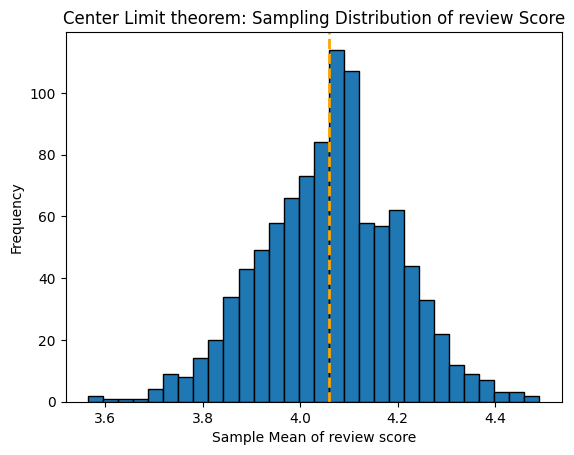

In [81]:
import numpy as np
# lets collect 100 samples of review_scores, take the mean. Repeat the same process a thousand times.
# Then take all the 1000 means use it to plot a histogram and lets see what the shape or distribution would look like.

# collect the samples
sample_means = []
for i in range(1000): #repeat 1000 times
    sample = orders_payments_reviews['review_score'].sample(100, replace=True)
    sample_means.append(sample.mean())


# Plotting the samling distribution
plt.hist(sample_means, bins=30, edgecolor='black')
plt.axvline(np.mean(sample_means), color='orange', linestyle='dashed', linewidth=2)
plt.title('Center Limit theorem: Sampling Distribution of review Score')
plt.xlabel('Sample Mean of review score')
plt.ylabel('Frequency')
plt.show()

### **One-Sample Test**

**A hypothesis** is just an assumption or claim about a population (the “big picture data”) that we want to test using a sample (the data we actually have).

- Let think of it like this;

 - It is like asking, “Does this medicine work?”

 - “Do credit card users spend more than boleto users?”

 - “Are customers happier than neutral (score 3)?”

Two be able to answer this question, we have to "**set up two competing statements**"

- **The first statement is called H0 (pronounced as H-not) or called the Null Hypothesis**
    - You can see it as the boring assumption.
    - It says, "Nothing special is happening, things are the same, things are neutral, the assumption is null"
    - This assumption is usually viewed as TRUE!
    - Because of this, we really need to conduct a test, this test is called the test of hypothesis. 
    - IF the evidence from the test is strong enough, then we have to `reject H0`
    - We know that this evidence is  not strong enough if the p-value is greater that the experiment score

**The second statement is called H₁ (pronounced as H-one) or called the Alternative Hypothesis**

 - You can see it as the interesting assumption.
 - It argues, “Something different is happening, things are not the same, things are not neutral.”
 - This is the claim we actually want to investigate.
 - If the evidence from the test is strong enough, then we reject H₀ and say H₁ is more likely true.

For example:

`If H₀ says “average review score = 3 (neutral)”`

`then H₁ argues “average review score ≠ 3 (not neutral).”`
- we will investigate H₁ to check.

`If H₀ says “credit card spend = boleto spend”`,
 
`then H₁ argues“credit card spend ≠ boleto spend.”`

So having understand the concept of hypthesis testing, let go back to **A one-sample test.** It is used when we want to check if the average (mean) of our sample data is different from some reference value (what we expect, or a “neutral” baseline).

`H₀ (Null Hypothesis)- Says the sample mean is equal to the reference value`

`H₁ (Alternative Hypothesis) - Says the sample mean is different from the reference value.`

- **Lets try setting up an hypothesis now...**

Suppose we want to test if customers are happier than neutral.

In our Olist data, the review_score ranges from 1–5. Neutral is 3. We want to test, “Is the average review score different from 3?”

**Step 1 – Set up hypotheses**

`H₀: Average review score = 3 (customers are neutral)`

`H₁: Average review score ≠ 3 (customers are not neutral, they are either happier or unhappier)`

**Step 2 – Why test it?**

- If H₀ is true, Olist has “just okay” service.

- If H₁ is true, Customers are clearly happy (if mean > 3) or unhappy (if mean < 3).

**Question1**

In the Olist e-commerce dataset, customer reviews are scored from 1 (worst) to 5 (best). A score of 3 is considered neutral.
Using the review data, test whether the average customer review score is significantly different from 3 (neutral)

In [82]:
# We have one sample, that is the set of all customer review scores.

# We are comparing its mean against a benchmark/reference value = 3.

# Now, the question is essentially, "Are Olist customers, on average, happier than neutral (3)?"

# Lets write the hypothesis

# H₀ (Null Hypothesis): The average review score is equal to 3
# H₁ (Alternative Hypothesis): The average review score is not equal to 3

# Extracting review scores
review_scores = order_reviews['review_score'].dropna()

# Define the 'neutral' benchmark
neutral_score = 3

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(review_scores, popmean=neutral_score)

print('Mean review Score:', round(review_scores.mean(), 2))
print('T-statistics:', round(t_stat, 3))
print('P_value', p_value)

# Interpretation 
if p_value < 0.05:
    print('Reject H0: The average review score is significantly different from 3 (neutral).')
else:
    print('Fail to reject H0: The data does not provide enough evidence that the average review differs from 3')

Mean review Score: 4.09
T-statistics: 253.952
P_value 0.0
Reject H0: The average review score is significantly different from 3 (neutral).


**Interpretation**

The p-value is ~0, way below 0.05 (strong evidence)

So we conclude that the customers are significantly happier than neutral.

### **Two-Sample t-test**

A two-sample t-test is a statistical test used to compare the average (mean) of two independent groups to see if they are significantly different from each other.

It answers the question, “Do two groups have the same average, or are their averages different?”

Null and Alternative Hypotheses (General Form)

H₀ (Null Hypothesis)- The two group means are equal.

`𝜇1=𝜇2`​

H₁ (Alternative Hypothesis)- The two group means are not equal.

`𝜇1≠𝜇2`

lets illustrate it this way...
Two groups - The test always involves two separate groups of data or categories.

Example: Men vs Women, Credit Card vs Boleto, Group A vs Group B.

To compute, We are not looking at individual values, but the overall group average.

But first, the groups have to be unrelated(independent samples) e.g, one customer can't belong to both payment methods at the same time.

How do we interprete the result,

- If the `p-value < 0.05` means the difference in means is significant.

- If `p-value ≥ 0.05` means the difference could just be due to chance.

**Lets have some illustrations here**

Just imagine that  your are the manager of Olist e-commerce platform. And you wish to know customers'payment preference from a data driven approach.

Yea? So you ask the question,"Do customers who pay with credit card spend more money than those who pay with Boleto(Bank slip)?"

 - Group1 - Customers who use Credit Card
 - Group2 - Customers who use Boleto

Variable we care about - payment_value


**Lets define our Hypothesis**

H₀ (Null Hypothesis) - On average, Credit Card users and Boleto users spend the same amount.


`𝜇(credit) = 𝜇(boleto)`
​

H₁ (Alternative Hypothesis):
"On average, Credit Card users spend differently than Boleto users."

`𝜇(credit) ≠ 𝜇(boleto)`


But, wait o, why can’t we just compare the averages directly?

The answer is because differences could happen by chance,  maybe we sampled just a few expensive orders on Credit Card. so the t-test helps us check if the difference is statistically significant (real) or just random noise.


**Question1**

- Extract the payment_value for orders paid with Credit Card and Boleto.

  - Perform a two-sample t-test and interpret the results

     - What are the average spends for each group?

     - What is the p-value?

     - Based on the p-value, do we reject or fail to reject the null hypothesis?

     - What does this mean in practical terms about customer spending behavior?

In [ ]:
# Lets craft the hypothesis
# H₀ (Null Hypothesis) -  The average payment_value of Credit Card orders is equal to the average payment_value of Boleto orders

# H₁ (Alternative Hypothesis) - The average payment_value of Credit Card orders is different from the average payment_value of Boleto orders.

In [83]:
# Print the columns 
orders_payments_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x',
       'order_purchase_timestamp_x', 'order_approved_at_x',
       'order_delivered_carrier_date_x', 'order_delivered_customer_date_x',
       'order_estimated_delivery_date_x', 'customer_unique_id_x',
       'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id_y', 'order_status_y',
       'order_purchase_timestamp_y', 'order_approved_at_y',
       'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
       'order_estimated_delivery_date_y', 'customer_unique_id_y',
       'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y', 'order_de

In [84]:
# Print the first 5 rows
orders_payments_reviews.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,...,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y,order_delivered_customer_date_,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,2017-10-10 21:25:13,8 days 10:28:40
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,2017-10-10 21:25:13,8 days 10:28:40
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59,2017-10-10 21:25:13,8 days 10:28:40
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,2017-10-10 21:25:13,8 days 10:28:40
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,2017-10-10 21:25:13,8 days 10:28:40


In [87]:
# Filter payment values by payment type
credit_card = orders_payments_reviews.loc[orders_payments_reviews['payment_type_y']=='credit_card', 'payment_value_y']

boleto = orders_payments_reviews.loc[orders_payments_reviews['payment_type_y']=='boleto', 'payment_value_y']

In [88]:
# Dropping missing values in the columns
credit_card = credit_card.dropna()
boleto = boleto.dropna()

# Display the mean for each output
print('Credit card average spend:', round(credit_card.mean(), 2))
print('Boleto Average spend', round(boleto.mean(), 2))


Credit card average spend: 159.07
Boleto Average spend 144.99


In [93]:
# Performing a two test 
t_stat, p_value = stats.ttest_ind(credit_card, boleto)

print('T-statistic:', round(t_stat, 2))
print('P-value:', p_value)

T-statistic: 8.12
P-value: 4.63555059553329e-16


**Interpretation**

**Case 1**

`p-value < 0.05 (Reject H₀)`

- This means there is a significant difference in spending between Credit Card and Boleto customers.

**Case 2**
`p-value ≥ 0.05 (Fail to Reject H₀)`

- This means we do not have enough evidence to say the spending is different.

In [95]:
T_statistic = 8.12
p_value = 4.63 * 10 **-16 #(which is basically 0.0000000000000000463)

#lets compare values using p-value with significance level (α = 0.05)

if p_value  < 0.05:
    print('Reject H0: The average payment_value of credit Card orders is different from the average payment_value of Boleto orders')

else:
    print('Fail to reject H0: The data does not provide enough evidence that the average payment_value of Credit Card orders differ from the average payment_value of Boleto orders.')

Reject H0: The average payment_value of credit Card orders is different from the average payment_value of Boleto orders


H₀ said that Credit Card users spend the same on average as Boleto users.

H₁ argued that Credit Card users spend differently than Boleto users.

From our test, t-test showed  that the difference is statistically significant (It is very unlikely to  be a random chance).

**Lets take our interpretation further**

Customers who pay with Credit Card spend significantly more on average than those who pay with Boleto.

So this insight can help Olist to;

1. Prioritize Credit Card payment promotions, since those customers bring more revenue.

2. Investigate why Boleto customers spend less, maybe boleto is used for smaller, lower-value purchases.